## Making Manhattan plots in Python

This notebook will likely not make much sense without watching [The video that produced this notebook](https://youtu.be/SwSgoAmYgG8).

Feel free to use any of the code here for any purpose.

Questions/comments? email martin@pythonforbiologists.com


## Links that are mentioned in the video:

[The Wikipedia page for Manhattan plots](https://en.wikipedia.org/wiki/Manhattan_plot)

[The Nature paper from which we took the data](https://www.nature.com/articles/s41588-018-0309-3) and the [SciHub link](https://sci-hub.tw/https://doi.org/10.1038/s41588-018-0309-3)

[The SSGAC page where the data files are linked](https://www.thessgac.org/data) and a [direct link to the data file](https://www.dropbox.com/s/dxfr1uq20wbdj1d/AUTOMOBILE_SPEEDING_PROPENSITY_GWAS.txt?dl=0)

[The Biological data exploration book](https://pythonforbiologists.com/biological-data-exploration-book) in which everything is explained in detail

[Subscribe to the Python for Biologists newsletter](https://pythonforbiologists.com/newsletter) to get updates about other useful stuff

[Follow Python for Biologists on twitter](https://twitter.com/pythonforbiolog) for more useful links


In [1]:
!head AUTOMOBILE_SPEEDING_PROPENSITY_GWAS.txt

MarkerName	CHR	POS	A1	A2	EAF_A1	Beta	SE	Pval
rs114608975	1	86028	T	C	0.908392	-0.00365	0.00370	0.3231
rs12238997	1	693731	A	G	0.877949	0.00420	0.00352	0.233
rs4565649	1	713092	A	G	0.00623653	-0.03358	0.02521	0.1828
rs149887893	1	714596	T	C	0.962227	0.01195	0.00637	0.06064
rs141090730	1	715205	C	G	0.993317	0.03074	0.02521	0.223
rs12184267	1	715265	T	C	0.0408069	-0.01003	0.00606	0.09815
rs12184277	1	715367	A	G	0.958931	0.01033	0.00605	0.08803
rs141784362	1	717474	T	C	0.00609794	-0.03283	0.02521	0.1929
rs12184279	1	717485	A	C	0.0405759	-0.01027	0.00608	0.09106


In [2]:
import pandas as pd

pd.read_csv('AUTOMOBILE_SPEEDING_PROPENSITY_GWAS.txt', sep='\t', nrows=1000)

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval
0,rs114608975,1,86028,T,C,0.908392,-0.00365,0.00370,0.32310
1,rs12238997,1,693731,A,G,0.877949,0.00420,0.00352,0.23300
2,rs4565649,1,713092,A,G,0.006237,-0.03358,0.02521,0.18280
3,rs149887893,1,714596,T,C,0.962227,0.01195,0.00637,0.06064
4,rs141090730,1,715205,C,G,0.993317,0.03074,0.02521,0.22300
...,...,...,...,...,...,...,...,...,...
995,rs145444272,1,986165,A,G,0.003588,-0.03485,0.01742,0.04537
996,rs147681220,1,986187,T,C,0.008377,0.01475,0.01964,0.45290
997,rs55707163,1,986286,T,C,0.012519,-0.00079,0.01581,0.96030
998,rs2710887,1,986443,T,C,0.899399,0.00552,0.00405,0.17270


In [3]:
df = pd.read_csv('AUTOMOBILE_SPEEDING_PROPENSITY_GWAS.txt', sep='\t')

In [8]:
import numpy as np

df['-logp'] = - np.log(df['Pval'])
df

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval,-logp
0,rs114608975,1,86028,T,C,0.908392,-0.00365,0.00370,0.32310,1.129793
1,rs12238997,1,693731,A,G,0.877949,0.00420,0.00352,0.23300,1.456717
2,rs4565649,1,713092,A,G,0.006237,-0.03358,0.02521,0.18280,1.699363
3,rs149887893,1,714596,T,C,0.962227,0.01195,0.00637,0.06064,2.802801
4,rs141090730,1,715205,C,G,0.993317,0.03074,0.02521,0.22300,1.500584
...,...,...,...,...,...,...,...,...,...,...
11514458,rs9616985,22,51229805,T,C,0.923606,-0.00428,0.00433,0.32310,1.129793
11514459,rs539541647,22,51231424,A,G,0.999399,-0.00469,0.03126,0.88080,0.126925
11514460,NaN,22,51234033,T,C,0.000416,0.00947,0.03254,0.77140,0.259548
11514461,rs3896457,22,51237063,T,C,0.714244,-0.00018,0.00246,0.94040,0.061450


In [20]:
running_pos = 0

cumulative_pos = []

for chrom, group_df in df.groupby('CHR'):  
    cumulative_pos.append(group_df['POS'] + running_pos)
    running_pos += group_df['POS'].max()
    
df['cumulative_pos'] = pd.concat(cumulative_pos)

df

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval,-logp,cumulative_pos
0,rs114608975,1,86028,T,C,0.908392,-0.00365,0.00370,0.32310,1.129793,86028
1,rs12238997,1,693731,A,G,0.877949,0.00420,0.00352,0.23300,1.456717,693731
2,rs4565649,1,713092,A,G,0.006237,-0.03358,0.02521,0.18280,1.699363,713092
3,rs149887893,1,714596,T,C,0.962227,0.01195,0.00637,0.06064,2.802801,714596
4,rs141090730,1,715205,C,G,0.993317,0.03074,0.02521,0.22300,1.500584,715205
...,...,...,...,...,...,...,...,...,...,...,...
11514458,rs9616985,22,51229805,T,C,0.923606,-0.00428,0.00433,0.32310,1.129793,2879361236
11514459,rs539541647,22,51231424,A,G,0.999399,-0.00469,0.03126,0.88080,0.126925,2879362855
11514460,NaN,22,51234033,T,C,0.000416,0.00947,0.03254,0.77140,0.259548,2879365464
11514461,rs3896457,22,51237063,T,C,0.714244,-0.00018,0.00246,0.94040,0.061450,2879368494


In [22]:
df['SNP number'] = df.index

df

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval,-logp,cumulative_pos,SNP number
0,rs114608975,1,86028,T,C,0.908392,-0.00365,0.00370,0.32310,1.129793,86028,0
1,rs12238997,1,693731,A,G,0.877949,0.00420,0.00352,0.23300,1.456717,693731,1
2,rs4565649,1,713092,A,G,0.006237,-0.03358,0.02521,0.18280,1.699363,713092,2
3,rs149887893,1,714596,T,C,0.962227,0.01195,0.00637,0.06064,2.802801,714596,3
4,rs141090730,1,715205,C,G,0.993317,0.03074,0.02521,0.22300,1.500584,715205,4
...,...,...,...,...,...,...,...,...,...,...,...,...
11514458,rs9616985,22,51229805,T,C,0.923606,-0.00428,0.00433,0.32310,1.129793,2879361236,11514458
11514459,rs539541647,22,51231424,A,G,0.999399,-0.00469,0.03126,0.88080,0.126925,2879362855,11514459
11514460,NaN,22,51234033,T,C,0.000416,0.00947,0.03254,0.77140,0.259548,2879365464,11514460
11514461,rs3896457,22,51237063,T,C,0.714244,-0.00018,0.00246,0.94040,0.061450,2879368494,11514461


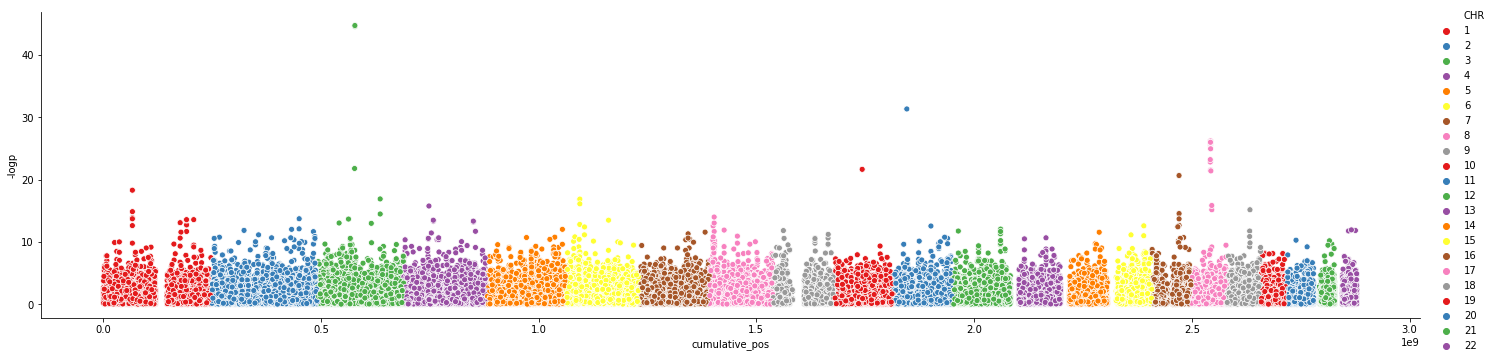

In [30]:
import seaborn as sns
%matplotlib inline

sns.relplot(
    data = df.sample(100000),
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'CHR',
    palette = 'Set1'
)

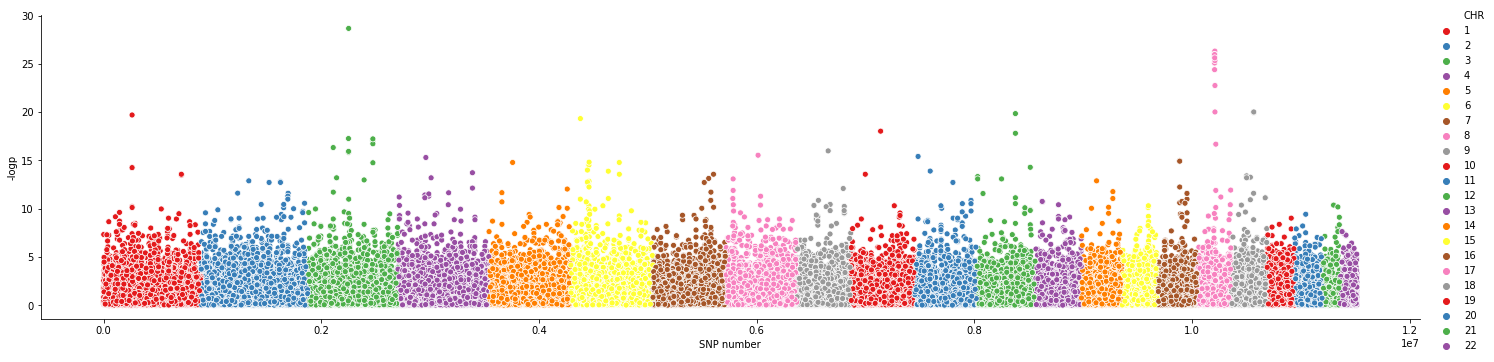

In [31]:
sns.relplot(
    data = df.sample(100000),
    x = 'SNP number',
    y = '-logp',
    aspect = 4,
    hue = 'CHR',
    palette = 'Set1'
)

Text(0.5, 0.98, 'GWAS plot showing association between SNPs on autosomes and speeding')

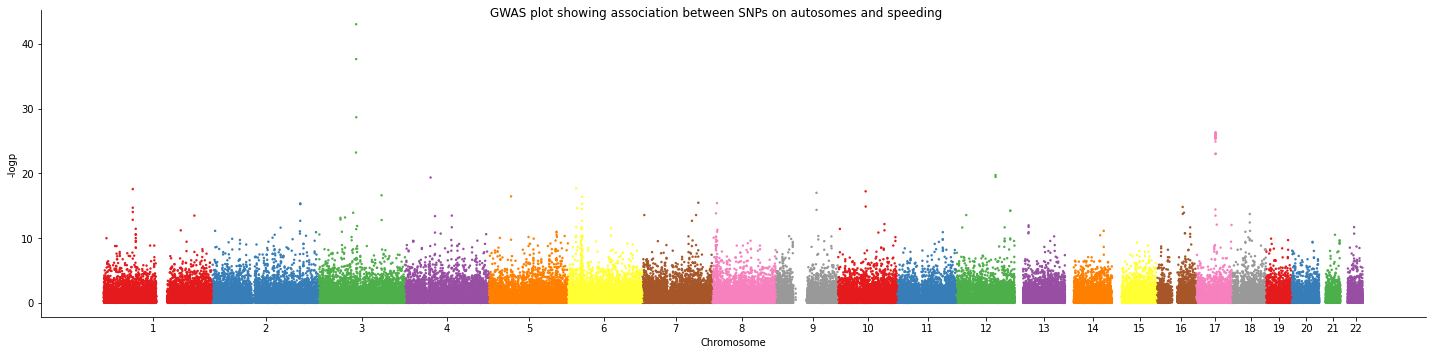

In [45]:
g = sns.relplot(
    data = df.sample(100000),
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'CHR',
    palette = 'Set1',
    linewidth=0,
    s=6,
    legend=None
)

g.ax.set_xlabel('Chromosome')

g.ax.set_xticks(df.groupby('CHR')['cumulative_pos'].median())

g.ax.set_xticklabels(df['CHR'].unique())

g.fig.suptitle('GWAS plot showing association between SNPs on autosomes and speeding')

In [47]:
['grey', 'black'] * 11

['grey',
 'black',
 'grey',
 'black',
 'grey',
 'black',
 'grey',
 'black',
 'grey',
 'black',
 'grey',
 'black',
 'grey',
 'black',
 'grey',
 'black',
 'grey',
 'black',
 'grey',
 'black',
 'grey',
 'black']

Text(0.5, 0.98, 'GWAS plot showing association between SNPs on autosomes and speeding')

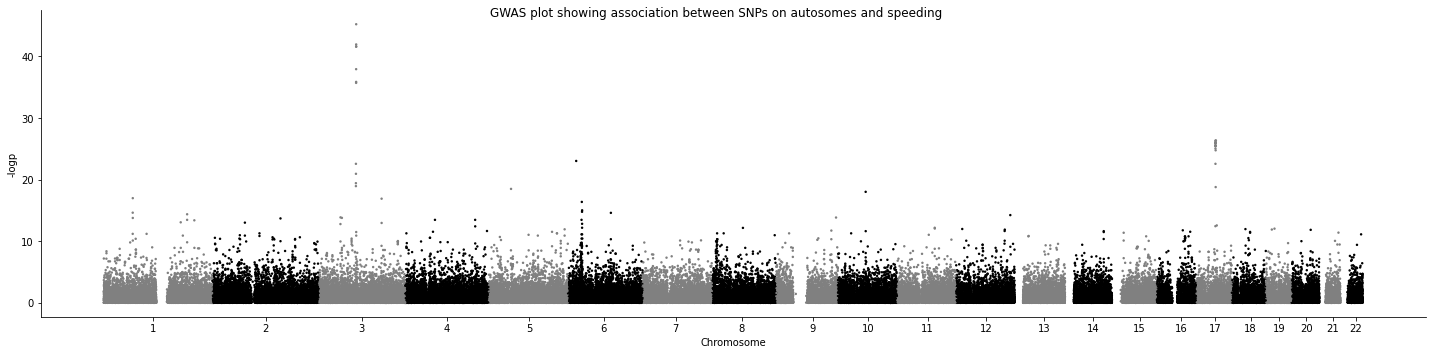

In [48]:
g = sns.relplot(
    data = df.sample(100000),
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'CHR',
    palette = ['grey', 'black'] * 11,
    linewidth=0,
    s=6,
    legend=None
)

g.ax.set_xlabel('Chromosome')

g.ax.set_xticks(df.groupby('CHR')['cumulative_pos'].median())

g.ax.set_xticklabels(df['CHR'].unique())

g.fig.suptitle('GWAS plot showing association between SNPs on autosomes and speeding')

In [51]:
df['color group'] = df['CHR'].apply(lambda x : 'A' if x % 2 == 0 else 'B')
df

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval,-logp,cumulative_pos,SNP number,color group
0,rs114608975,1,86028,T,C,0.908392,-0.00365,0.00370,0.32310,1.129793,86028,0,B
1,rs12238997,1,693731,A,G,0.877949,0.00420,0.00352,0.23300,1.456717,693731,1,B
2,rs4565649,1,713092,A,G,0.006237,-0.03358,0.02521,0.18280,1.699363,713092,2,B
3,rs149887893,1,714596,T,C,0.962227,0.01195,0.00637,0.06064,2.802801,714596,3,B
4,rs141090730,1,715205,C,G,0.993317,0.03074,0.02521,0.22300,1.500584,715205,4,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11514458,rs9616985,22,51229805,T,C,0.923606,-0.00428,0.00433,0.32310,1.129793,2879361236,11514458,A
11514459,rs539541647,22,51231424,A,G,0.999399,-0.00469,0.03126,0.88080,0.126925,2879362855,11514459,A
11514460,NaN,22,51234033,T,C,0.000416,0.00947,0.03254,0.77140,0.259548,2879365464,11514460,A
11514461,rs3896457,22,51237063,T,C,0.714244,-0.00018,0.00246,0.94040,0.061450,2879368494,11514461,A


Text(0.5, 0.98, 'GWAS plot showing association between SNPs on autosomes and speeding')

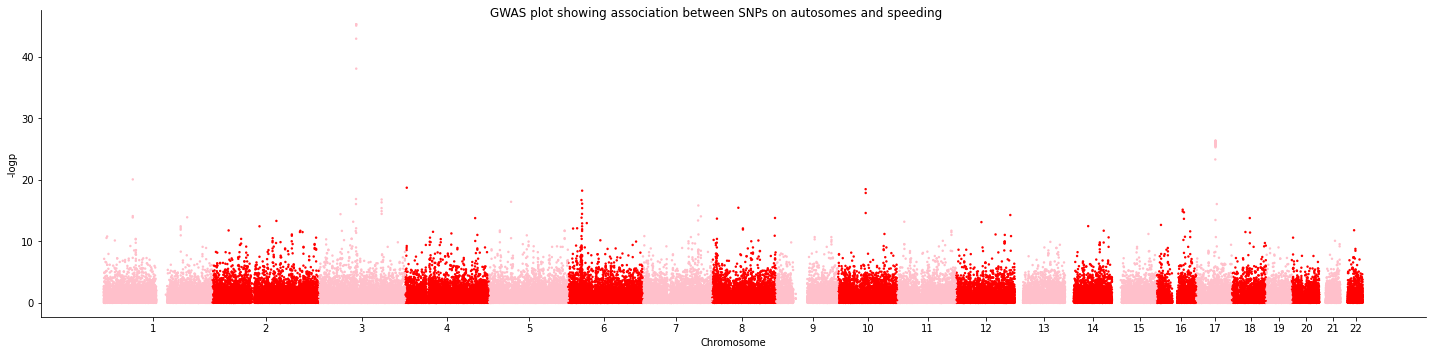

In [52]:
g = sns.relplot(
    data = df.sample(100000),
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'color group',
    palette = ['red', 'pink'],
    linewidth=0,
    s=6,
    legend=None
)

g.ax.set_xlabel('Chromosome')

g.ax.set_xticks(df.groupby('CHR')['cumulative_pos'].median())

g.ax.set_xticklabels(df['CHR'].unique())

g.fig.suptitle('GWAS plot showing association between SNPs on autosomes and speeding')

Text(0.5, 0.98, 'GWAS plot showing association between SNPs on autosomes and speeding')

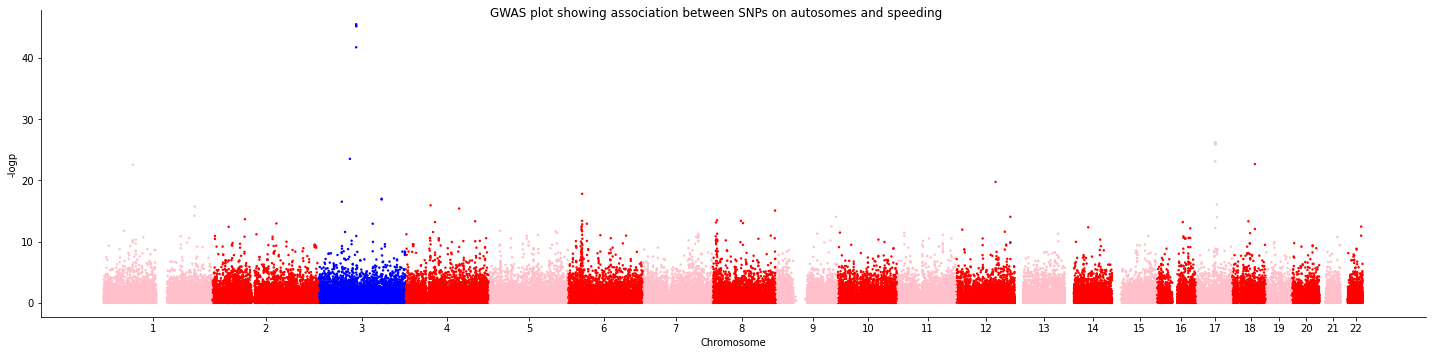

In [57]:
df['color group'] = df['CHR'].apply(lambda x : 'A' if x % 2 == 0 else 'B')
df.loc[df['CHR'] == 3, 'color group'] = 'C'

g = sns.relplot(
    data = df.sample(100000),
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'color group',
    palette = ['red', 'pink', 'blue'],
    linewidth=0,
    s=6,
    legend=None
)

g.ax.set_xlabel('Chromosome')

g.ax.set_xticks(df.groupby('CHR')['cumulative_pos'].median())

g.ax.set_xticklabels(df['CHR'].unique())

g.fig.suptitle('GWAS plot showing association between SNPs on autosomes and speeding')

Text(0.5, 0.98, 'GWAS plot showing association between SNPs on autosomes and speeding')

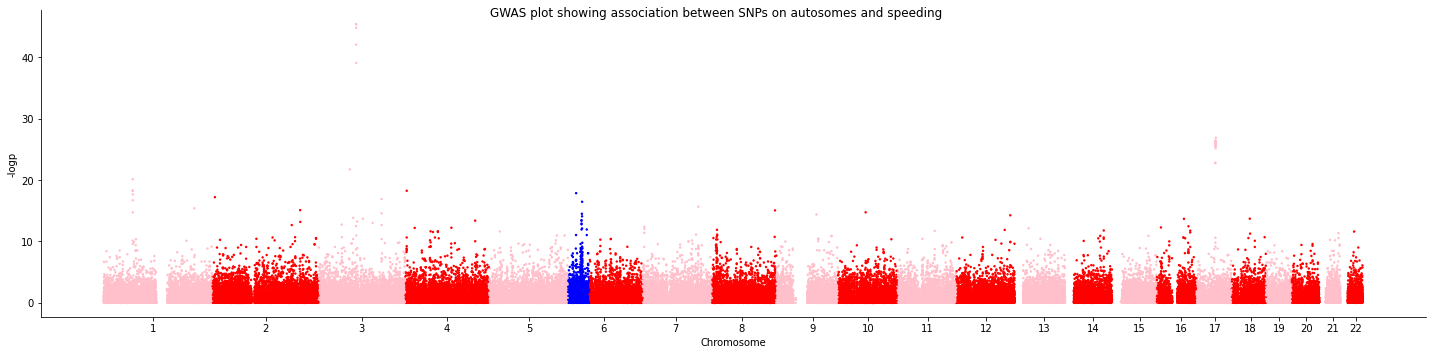

In [58]:
df['color group'] = df['CHR'].apply(lambda x : 'A' if x % 2 == 0 else 'B')
df.loc[(df['CHR'] == 6) & (df['POS'] < 50000000), 'color group'] = 'C'

g = sns.relplot(
    data = df.sample(100000),
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'color group',
    palette = ['red', 'pink', 'blue'],
    linewidth=0,
    s=6,
    legend=None
)

g.ax.set_xlabel('Chromosome')

g.ax.set_xticks(df.groupby('CHR')['cumulative_pos'].median())

g.ax.set_xticklabels(df['CHR'].unique())

g.fig.suptitle('GWAS plot showing association between SNPs on autosomes and speeding')

Text(0.5, 0.98, 'GWAS plot showing association between SNPs on autosomes and speeding')

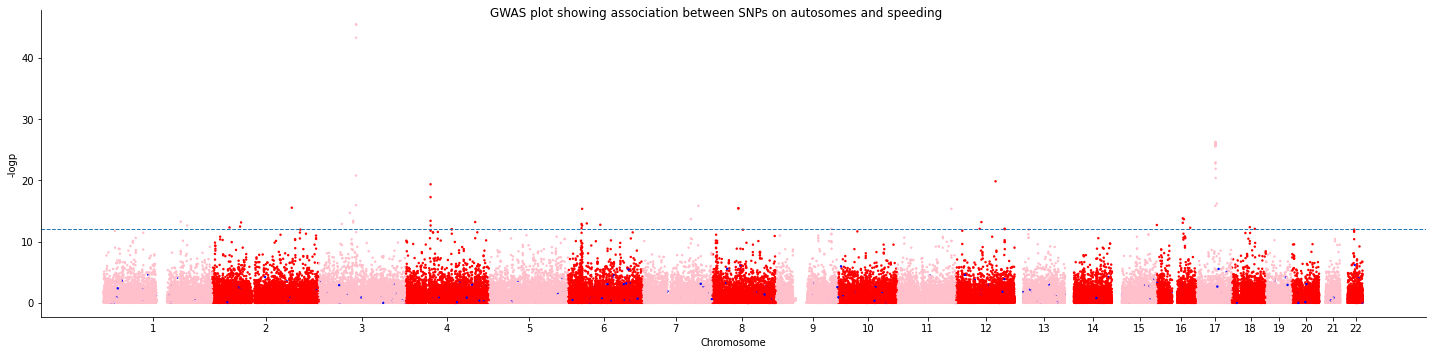

In [62]:
my_markers = df['MarkerName'].sample(100)

df['color group'] = df['CHR'].apply(lambda x : 'A' if x % 2 == 0 else 'B')

df.loc[df['MarkerName'].isin(my_markers), 'color group'] = 'C'

g = sns.relplot(
    data = df.sample(100000),
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'color group',
    palette = ['red', 'pink', 'blue'],
    linewidth=0,
    s=6,
    legend=None
)

g.ax.set_xlabel('Chromosome')

g.ax.set_xticks(df.groupby('CHR')['cumulative_pos'].median())

g.ax.set_xticklabels(df['CHR'].unique())

g.ax.axhline(12, linestyle='--', linewidth=1)

g.fig.suptitle('GWAS plot showing association between SNPs on autosomes and speeding')

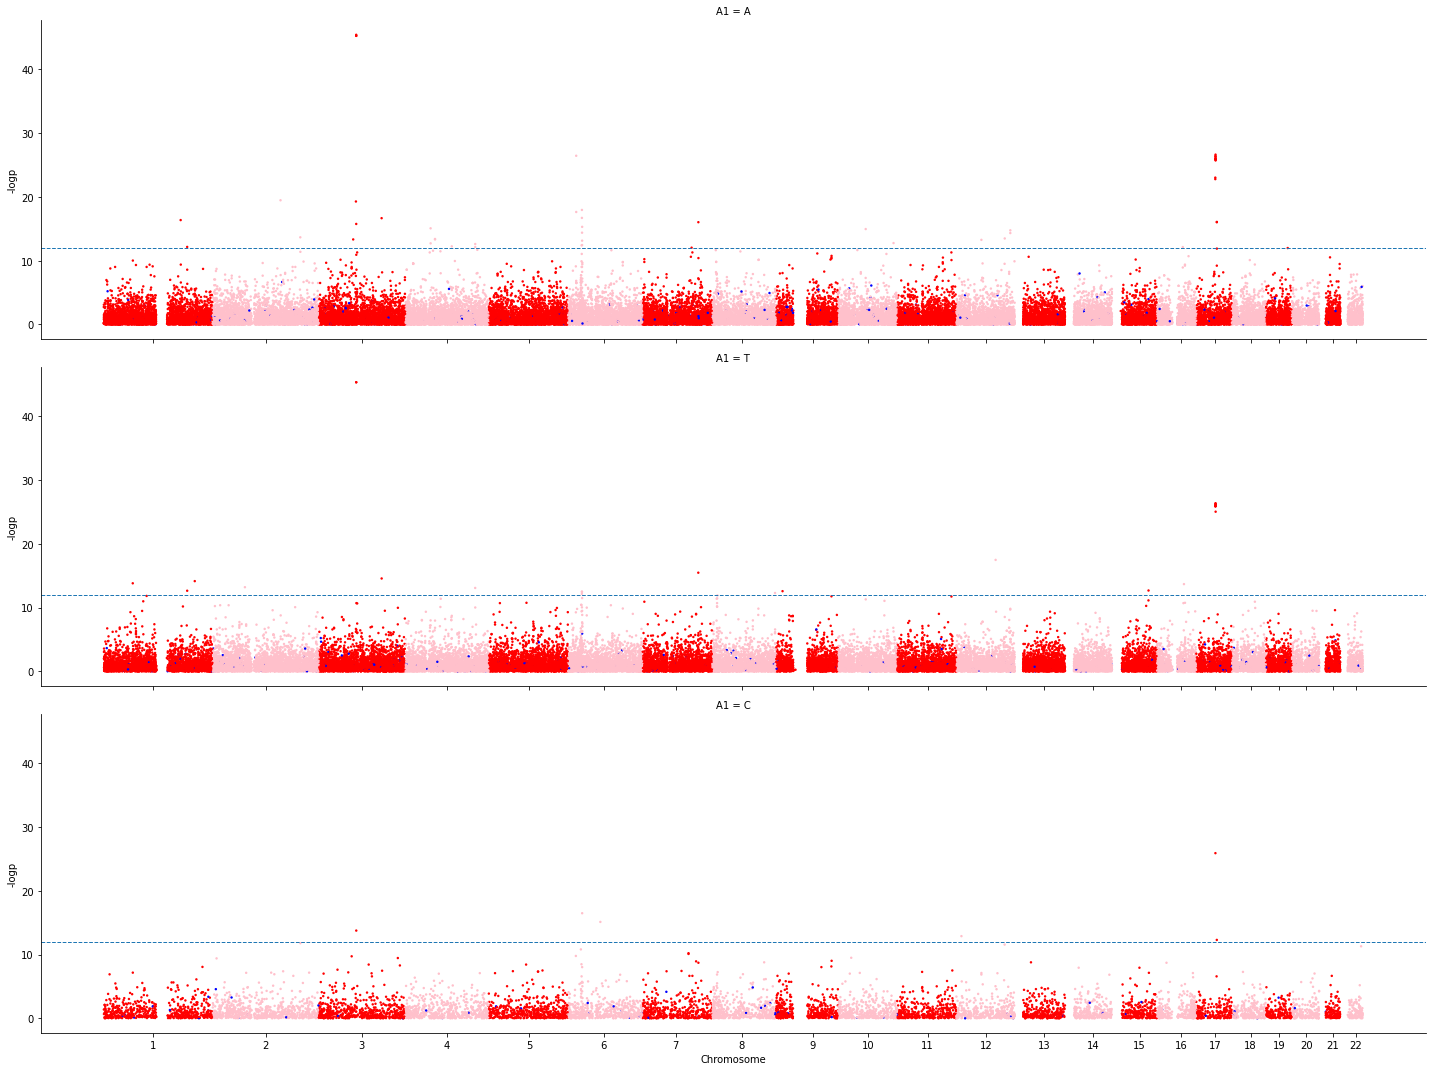

In [65]:
my_markers = df['MarkerName'].sample(100)

df['color group'] = df['CHR'].apply(lambda x : 'A' if x % 2 == 0 else 'B')

df.loc[df['MarkerName'].isin(my_markers), 'color group'] = 'C'

g = sns.relplot(
    data = df.sample(100000),
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'color group',
    palette = ['red', 'pink', 'blue'],
    linewidth=0,
    s=6,
    legend=None,
    row = 'A1'
)

for ax in g.axes.flat:
    ax.set_xlabel('Chromosome')

    ax.set_xticks(df.groupby('CHR')['cumulative_pos'].median())

    ax.set_xticklabels(df['CHR'].unique())

    ax.axhline(12, linestyle='--', linewidth=1)

In [70]:
my_data[my_data['-logp'] > 20]

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval,-logp,cumulative_pos,SNP number,color group
2250324,rs4856584,3,85580328,A,T,0.345981,0.02089,0.00236,7.855000e-19,41.687966,577991084,2250324,B
10206547,rs111415173,17,43795573,T,C,0.205790,-0.01858,0.00270,5.741000e-12,25.883388,2542636510,10206547,B
10206683,rs62054421,17,43816657,A,G,0.206483,-0.01858,0.00270,5.741000e-12,25.883388,2542657594,10206683,B
2250800,rs62263910,3,85647614,T,G,0.622513,-0.02140,0.00233,3.993000e-20,44.667159,578058370,2250800,B
10206842,rs71375313,17,43839253,A,G,0.205698,-0.01838,0.00270,9.909000e-12,25.337578,2542680190,10206842,B
7137990,rs4948477,10,63590749,A,G,0.625500,-0.01386,0.00228,1.264000e-09,20.488985,1743012793,7137990,A
2250497,rs6783138,3,85599920,C,G,0.378365,0.02150,0.00233,2.618000e-20,45.089291,578010676,2250497,B
2250529,rs7640828,3,85603371,A,G,0.652387,-0.02073,0.00236,1.426000e-18,41.091658,578014127,2250529,B
10205805,rs12949256,17,43507297,T,C,0.174607,-0.01860,0.00290,1.443000e-10,22.659127,2542348234,10205805,B
2250315,rs12633657,3,85578841,A,C,0.652140,-0.02095,0.00236,6.037000e-19,41.951210,577989597,2250315,B


216

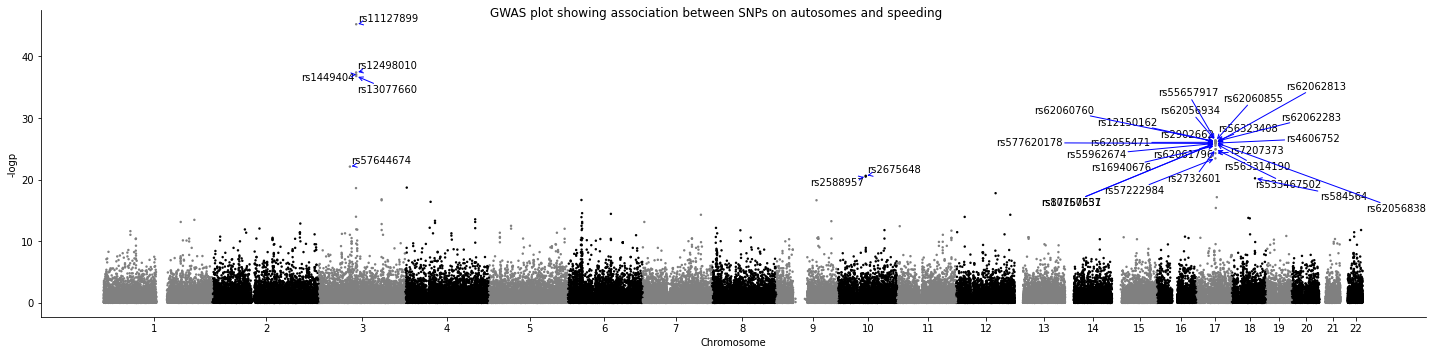

In [81]:
import adjustText
from adjustText import adjust_text

my_data = df.sample(100000)

g = sns.relplot(
    data = my_data,
    x = 'cumulative_pos',
    y = '-logp',
    aspect = 4,
    hue = 'CHR',
    palette = ['grey', 'black'] * 11,
    linewidth=0,
    s=6,
    legend=None
)

g.ax.set_xlabel('Chromosome')

g.ax.set_xticks(my_data.groupby('CHR')['cumulative_pos'].median())

g.ax.set_xticklabels(df['CHR'].unique())

g.fig.suptitle('GWAS plot showing association between SNPs on autosomes and speeding')

annotations = my_data[my_data['-logp'] > 20].apply(lambda p : g.ax.annotate(p['MarkerName'], (p['cumulative_pos'], p['-logp'])), axis=1).to_list()

adjust_text(annotations, arrowprops = {'arrowstyle' : '->', 'color' : 'blue'})